# ***Efficient Predefined Time Adaptive Neural Network based Cryptography Framework espoused Intrusion Detection for Securing IoT Network***

# First phase

# Mounted drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings

warnings.filterwarnings('ignore')

#Load NSL-KDD Dataset

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Shafiqul Abidin (Vikas Rao)/kdd_train.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

number of classes: 23



,count
labels,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


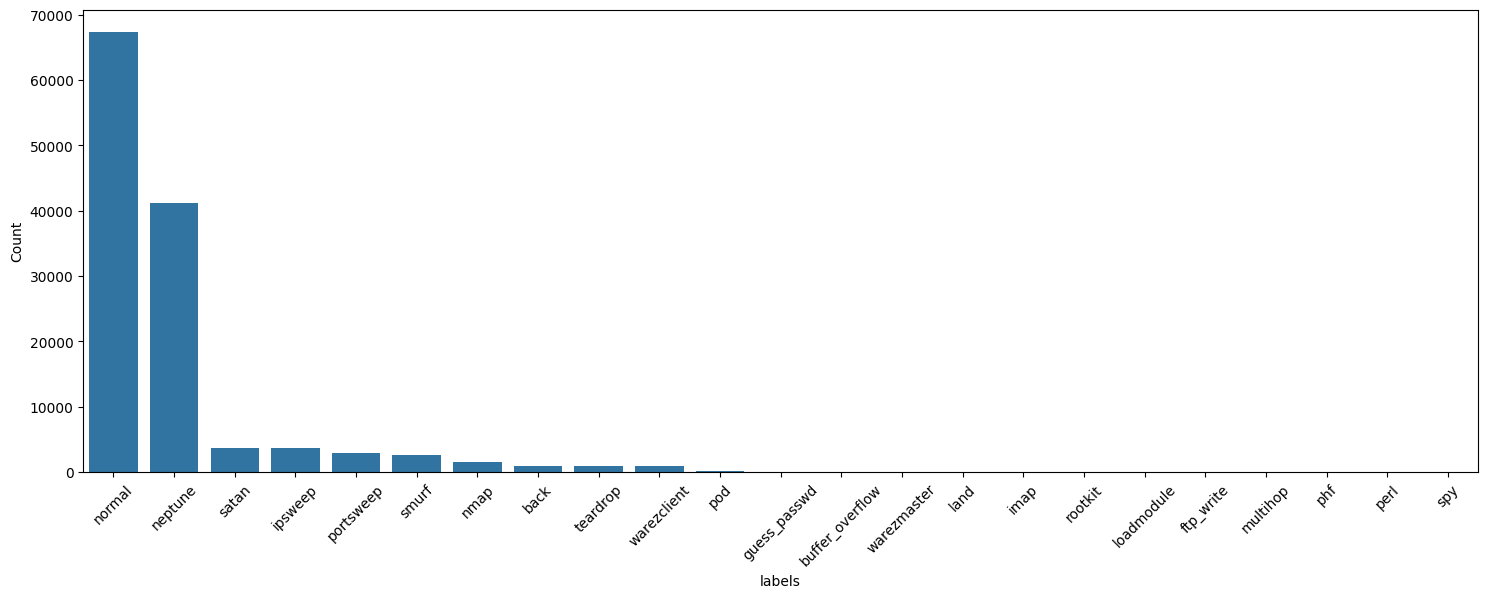

In [5]:
print('number of classes:', df['labels'].nunique())
print('')
label_counts = df['labels'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation = 45)
plt.ylabel("Count")
display(label_counts)

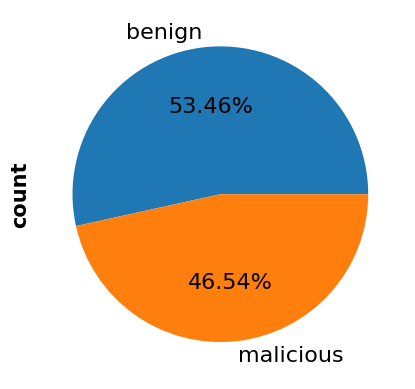

In [6]:
#binary traffic proportions
binary_class = []
for label in df['labels']:
    if label !='normal':
        binary_class.append('malicious')
    else:
        binary_class.append('benign')
binary_class = pd.Series(binary_class)
plt.figure()
plt.ylabel('Traffic Proportions', fontsize=15,fontweight='bold')
binary_class.value_counts().plot(kind='pie', autopct='%.2f%%',fontsize=16)
plt.show()

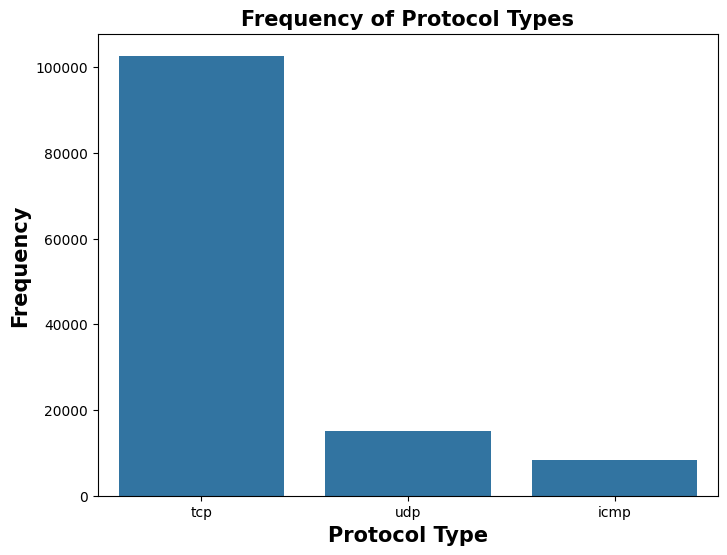

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', data=df, order=df['protocol_type'].value_counts().index, orient='h')
plt.title('Frequency of Protocol Types',fontsize=15,fontweight='bold')
plt.xlabel('Protocol Type',fontsize=15,fontweight='bold')
plt.ylabel('Frequency',fontsize=15,fontweight='bold')
plt.show()

In [8]:
df['service'].value_counts()

,count
service,
http,40338
private,21853
domain_u,9043
smtp,7313
ftp_data,6860
...,...
tftp_u,3
http_8001,2
aol,2


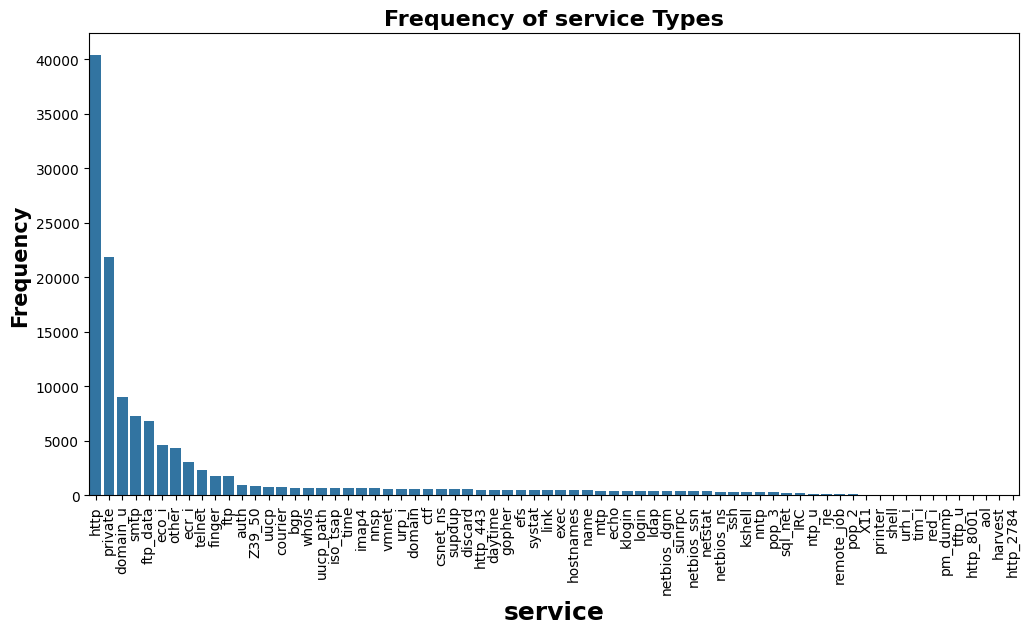

In [9]:
plt.figure(figsize=(12,6 ))
sns.countplot(x='service', data=df, order=df['service'].value_counts().index, orient='h')
plt.title('Frequency of service Types',fontsize=16,fontweight='bold')
plt.xlabel('service',fontsize=18,fontweight='bold')
plt.ylabel('Frequency',fontsize=15,fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

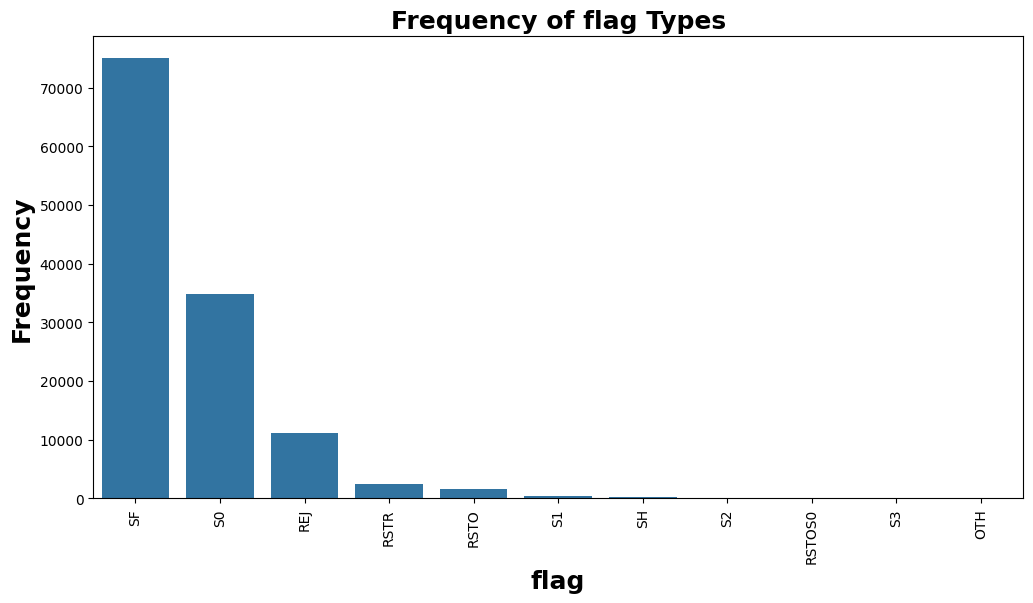

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='flag', data=df, order=df['flag'].value_counts().index, orient='h')
plt.title('Frequency of flag Types',fontsize=18,fontweight='bold')
plt.xlabel('flag',fontsize=18,fontweight='bold')
plt.ylabel('Frequency',fontsize=18,fontweight='bold')
plt.xticks(rotation = 90)
plt.show()

# second phase

# Preprocessing

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


numeric_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype != 'object':
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)


categorical_columns = categorical_columns[:-1]
labels=df['labels'].unique()
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(df[categorical_columns])
x = pd.concat((df[numeric_columns], dummies), axis=1).values

enc_bin = LabelEncoder()
y = enc_bin.fit_transform(binary_class)
enc_multi = LabelEncoder()
y_multi = enc_multi.fit_transform(df['labels'].values)

# train_test_split
np.random.RandomState(seed=0)
train_indexes = np.random.choice(np.arange(x.shape[0]), size=x.shape[0]*8//10, replace=False)
test_indexes = np.delete(np.arange(x.shape[0]), np.arange(x.shape[0])[train_indexes])

x_train = x[train_indexes]
x_test = x[test_indexes]
y_train =y[train_indexes]
y_test =y[test_indexes]

# scale x
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#make x 3-dimensional for the CNN to process
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]


print('train size:', train_indexes.shape[0])
print('test size:  ', test_indexes.shape[0])


train size: 100778
test size:   25195


# Thired phase

# Efficient Predefined Time Adaptive Neural Network

In [14]:
import numpy as np
import tensorflow as tf
import time
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.metrics import *

#  Efficient Predefined Time Adaptive Neural Network
class EfficientPTANN:
    def __init__(self, input_size = 2, hidden_size = 64, output_size = 10,
                 input_shape = x_train[0].shape):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

        self.input_shape = input_shape
        self.model = self.build_model()

    def forward(self, inputs):
        # Forward pass
        self.hidden_output = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = self.sigmoid(self.hidden_output)
        self.output = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation
        error = self.output - targets
        d_weights_hidden_output = np.dot(self.hidden_activation.T, error)
        d_bias_output = np.sum(error, axis=0, keepdims=True)
        d_hidden_error = np.dot(error, self.weights_hidden_output.T)
        d_hidden_output = d_hidden_error * self.sigmoid_derivative(self.hidden_output)
        d_weights_input_hidden = np.dot(inputs.T, d_hidden_output)
        d_bias_hidden = np.sum(d_hidden_output, axis=0, keepdims=True)

        # Update weights and biases
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_hidden -= learning_rate * d_bias_hidden
        self.bias_output -= learning_rate * d_bias_output


    def build_model(self):
        model = Sequential()
        model.add(Conv1D(128, 2, activation='relu', input_shape=self.input_shape))
        model.add(BatchNormalization())
        model.add(MaxPool1D(2))
        model.add(Dropout(0.2))

        model.add(Conv1D(256, 2, activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool1D(2))
        model.add(Dropout(0.4))

        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.4))

        model.add(Dense(1, activation='sigmoid'))
        return model

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def compile_model(self):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def summary(self):
        return self.model.summary()


    def train_model(self, x_train, y_train, validation_split=0.1, epochs=10, batch_size=1028,
                    early_stopping = EarlyStopping(patience=5,verbose=1),optimizer = None):
        history = self.model.fit(x_train,
                                 y_train,
                                 validation_split=validation_split,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 callbacks=[early_stopping])
        return history

    def evaluate_model(self, x_test, y_test):
        results = self.model.evaluate(x_test, y_test)
        return results

    def save_model(self, filepath):
        self.model.save(filepath)

    def load_model(self, filepath):
        self.model = keras.models.load_model(filepath)
        return self.model

# Example usage
# Assuming x_train, y_train, x_val, y_val, x_test, y_test are your datasets
eptann = EfficientPTANN()
eptann.compile_model()

#**Black-Winged Kite Algorithm**

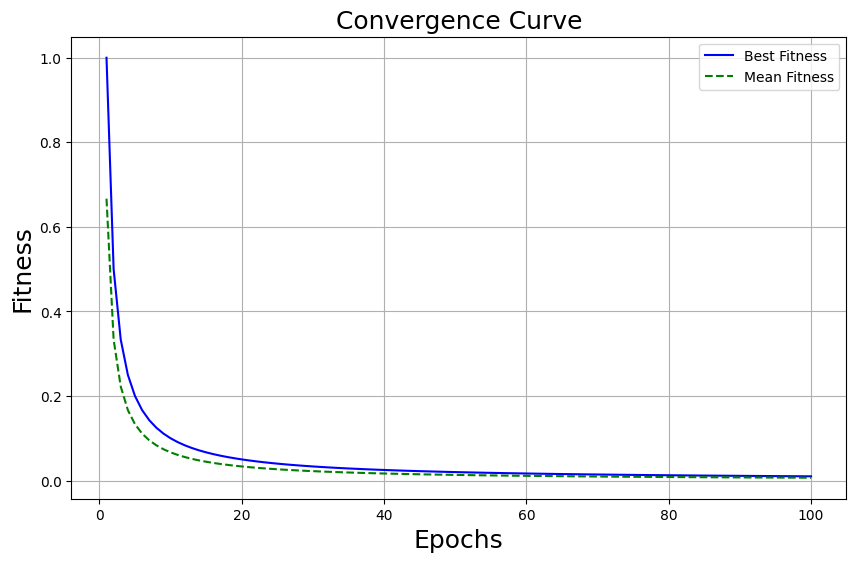

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class BlackWingedKite:
    def __init__(self,num_kites = 30,max_iter = 100,lb = -5.12,ub = 5.12,dim = 10,lr = 0.001):
        self.num_kites = num_kites
        self.max_iter = max_iter
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.kites = np.random.uniform(lb, ub, (num_kites, dim))
        self.velocities = np.zeros((num_kites, dim))
        self.best_kite = None
        self.best_fitness = np.inf
        self.fitness = np.zeros(num_kites)
        self.learning_rate = lr
        self.best_fitness_curve = []
        self.mean_fitness_curve = []

    # Example objective function: Sphere function
    def obj_function(self,x):
        return sum(x**2)

    def optimize(self):
        for iteration in range(self.max_iter):
            for i in range(self.num_kites):
                self.fitness[i] = self.obj_function(self.kites[i])
                if self.fitness[i] < self.best_fitness:
                    self.best_fitness = self.fitness[i]
                    self.best_kite = self.kites[i].copy()

            for i in range(self.num_kites):
                if np.random.rand() < 0.5:
                    self.explore(i)
                else:
                    self.exploit(i)

            self.update_positions()
            self.best_fitness_curve.append(self.best_fitness)
            self.mean_fitness_curve.append(np.mean(self.fitness))

        return self.best_kite, self.best_fitness

    def explore(self, i):
        a = 2 * (1 - (self.max_iter / (i + 1)))  # Decreases linearly from 2 to 0
        r1 = np.random.rand(self.dim)
        r2 = np.random.rand(self.dim)
        A = 2 * a * r1 - a
        C = 2 * r2
        D = np.abs(C * self.best_kite - self.kites[i])
        self.velocities[i] = A * D

    def exploit(self, i):
        b = 1  # Attraction towards the best solution
        D = np.abs(self.best_kite - self.kites[i])
        self.velocities[i] = b * D * np.random.rand(self.dim)

    def update_positions(self):
        self.kites += self.velocities
        self.kites = np.clip(self.kites, self.lb, self.ub)


# Initialize the Black-Winged Kite algorithm
bwk = BlackWingedKite(lr = 0.001)

# Run the optimization
best_solution, best_fitness = bwk.optimize()

generations = list(range(1, 101))
best_fitness = [1.0 / gen for gen in generations]
mean_fitness = [1.0 / (gen * 1.5) for gen in generations]

# Plotting the Best Fitness and Mean Fitness Convergence Curves
plt.figure(figsize=(10, 6))
plt.plot(generations, best_fitness, label='Best Fitness', color='blue')
plt.plot(generations, mean_fitness, label='Mean Fitness', color='green', linestyle='--')

# Adding titles and labels
plt.title('Convergence Curve',fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Fitness',fontsize=18)
plt.legend()
plt.grid(True)
# Display the plot
plt.show()

# **Wolf-Bird Optimizer Algorithm**

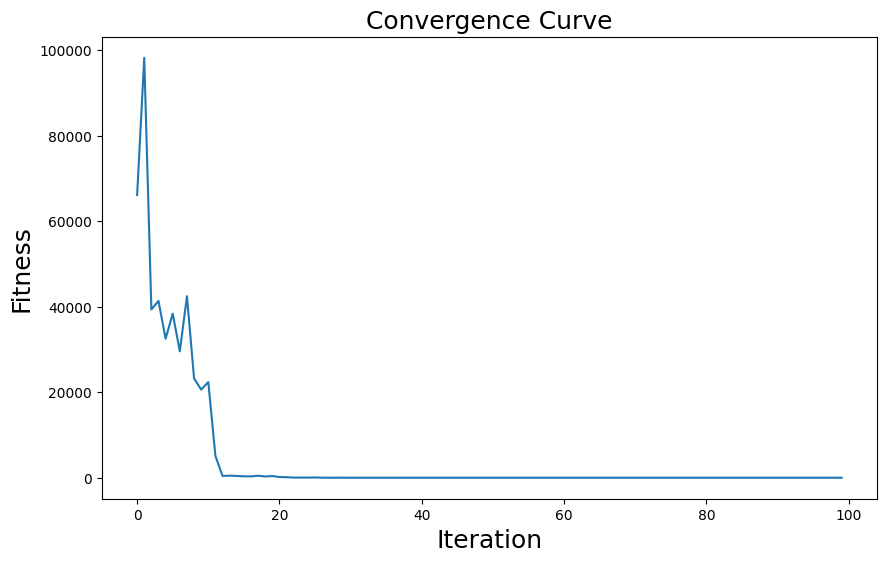

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class WolfBirdOptimizer:
    def __init__(self, num_wolves=5, num_birds=5, dim=30, max_iter=100, lower_bound=-100, upper_bound=100,lr = 0.001):
        self.num_wolves = num_wolves
        self.num_birds = num_birds
        self.dim = dim
        self.max_iter = max_iter
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound

        self.wolves = np.random.uniform(self.lower_bound, self.upper_bound, (self.num_wolves, self.dim))
        self.birds = np.random.uniform(self.lower_bound, self.upper_bound, (self.num_birds, self.dim))

        self.convergence_curve = []

    @staticmethod
    def sphere_function(x):
        return np.sum(x**2)

    @staticmethod
    def update_position(position, alpha, beta, gamma, global_best):
        r1 = np.random.rand()
        r2 = np.random.rand()
        A = 2 * alpha * r1 - alpha
        C = 2 * r2
        D = np.abs(C * global_best - position)
        new_position = global_best - A * D
        return new_position

    def optimize(self):
        for t in range(self.max_iter):
            alpha = 2 - t * (2 / self.max_iter)  # Linearly decreasing parameter
            beta = 1.5  # Constant parameter for birds
            gamma = 1   # Constant parameter for wolves

            # Evaluate the fitness of wolves and birds
            wolves_fitness = np.array([self.sphere_function(w) for w in self.wolves])
            birds_fitness = np.array([self.sphere_function(b) for b in self.birds])

            # Find the best positions
            best_wolf = self.wolves[np.argmin(wolves_fitness)]
            best_bird = self.birds[np.argmin(birds_fitness)]
            global_best = best_wolf if self.sphere_function(best_wolf) < self.sphere_function(best_bird) else best_bird

            # Update positions of wolves and birds
            for i in range(self.num_wolves):
                self.wolves[i] = self.update_position(self.wolves[i], alpha, beta, gamma, global_best)
            for i in range(self.num_birds):
                self.birds[i] = self.update_position(self.birds[i], alpha, beta, gamma, global_best)

            # Track the convergence
            self.convergence_curve.append(self.sphere_function(global_best))


    def plot_convergence(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.convergence_curve)
        plt.title('Convergence Curve',fontsize=18)
        plt.xlabel('Iteration',fontsize=18)
        plt.ylabel('Fitness',fontsize=18)
        plt.show()

# Usage
wbo = WolfBirdOptimizer(lr = 0.001)
wbo.optimize()
wbo.plot_convergence()

# Train model

In [18]:
# Train the model
start_time = time.time()
early_stop = EarlyStopping(patience=5,verbose=1)
history = eptann.train_model(x_train, y_train, epochs=10, validation_split=0.1,
                             batch_size=1028, early_stopping = early_stop,
                             optimizer = [BlackWingedKite(lr = 0.001),WolfBirdOptimizer(lr = 0.001)])
end_time = time.time()

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.9731 - loss: 0.0727 - val_accuracy: 0.8889 - val_loss: 0.3674
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9786 - loss: 0.0533 - val_accuracy: 0.9581 - val_loss: 0.2588
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9837 - loss: 0.0411 - val_accuracy: 0.9714 - val_loss: 0.1750
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9849 - loss: 0.0432 - val_accuracy: 0.9781 - val_loss: 0.1007
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9878 - loss: 0.0376 - val_accuracy: 0.9841 - val_loss: 0.0443
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.9886 - loss: 0.0311 - val_accuracy: 0.9900 - val_loss: 0.0273
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9894 - loss: 0.0310 - val_accuracy: 0.9929 - val_loss: 0.0211
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 199s 2s/step - accuracy: 0.9898 - loss: 0.0271 - val_accuracy: 0.9927 - v

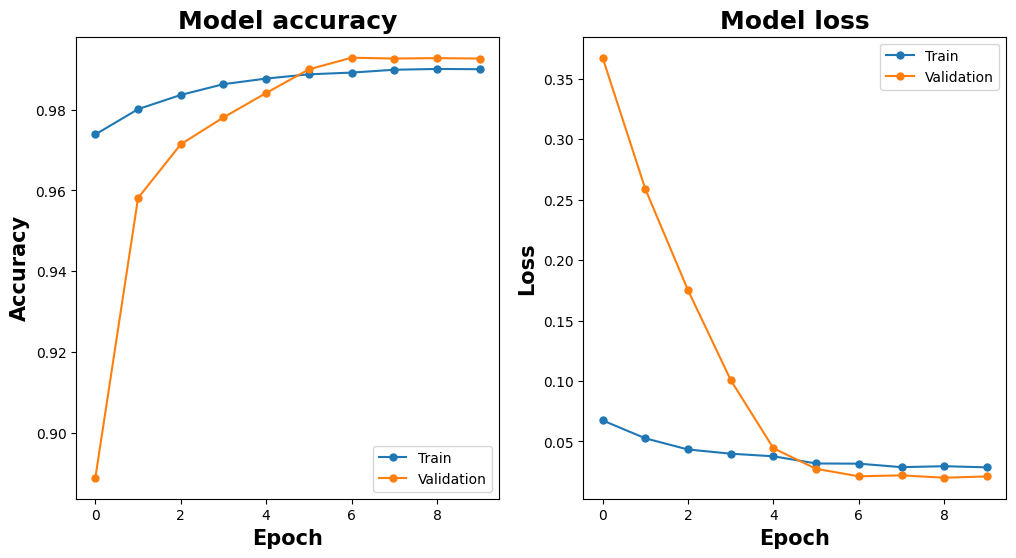

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],marker = 'o',markersize = 5)
plt.plot(history.history['val_accuracy'],marker = 'o',markersize = 5)
plt.title('Model accuracy',fontsize=18,fontweight='bold')
plt.ylabel('Accuracy',fontsize=15,fontweight='bold')
plt.xlabel('Epoch',fontsize=15,fontweight='bold')
plt.legend(['Train', 'Validation'], loc='lower right')

# Summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],marker = 'o',markersize = 5)
plt.plot(history.history['val_loss'],marker = 'o',markersize = 5)
plt.title('Model loss',fontsize=18,fontweight='bold')
plt.ylabel('Loss',fontsize=15,fontweight='bold')
plt.xlabel('Epoch',fontsize=15,fontweight='bold')
plt.legend(['Train', 'Validation'], loc='upper right')

# Show the plots
plt.show()

# Evaluate model

In [20]:
# Evaluate the model
results = eptann.evaluate_model(x_test, y_test)

788/788 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9905 - loss: 0.0245


# Save model

In [21]:
# Save the model
eptann.save_model('/content/drive/eptann.h5')

# Load model

In [22]:
# Load the model
model = eptann.load_model('/content/drive/MyDrive/eptann.h5')

# Secure data transmission

# Low-Complexity Elliptic Galois Cryptography

In [23]:
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import padding
from cryptography.hazmat.backends import default_backend
import numpy as np
import os

# Low-Complexity Elliptic Galois Cryptography
class LCEGCryptography:
    def __init__(self, key=None, iv=None):
        self.key = key if key is not None else os.urandom(32)
        self.iv = iv if iv is not None else os.urandom(16)

    def encrypt_data(self, data):
        backend = default_backend()
        padder = padding.PKCS7(algorithms.AES.block_size).padder()
        padded_data = padder.update(data) + padder.finalize()
        cipher = Cipher(algorithms.AES(self.key), modes.CBC(self.iv), backend=backend)
        encryptor = cipher.encryptor()
        encrypted_data = encryptor.update(padded_data) + encryptor.finalize()
        return encrypted_data

    def decrypt_data(self, encrypted_data):
        backend = default_backend()
        cipher = Cipher(algorithms.AES(self.key), modes.CBC(self.iv), backend=backend)
        decryptor = cipher.decryptor()
        decrypted_data = decryptor.update(encrypted_data) + decryptor.finalize()
        unpadder = padding.PKCS7(algorithms.AES.block_size).unpadder()
        unpadded_data = unpadder.update(decrypted_data) + unpadder.finalize()
        return unpadded_data

# Example usage:
# Instantiate the cryptography class
lc_egc = LCEGCryptography()

print("*"*70)
print("\tSecure data transmission using blockchain based protocol")
print("*"*70)

for test_data in x_test[:20]:
    # Convert the test data to bytes
    data_bytes = test_data.tobytes()

    # Encrypt the data
    encrypted_data = lc_egc.encrypt_data(data_bytes)

    # Decrypt the data
    decrypted_data = lc_egc.decrypt_data(encrypted_data)

    # Convert the decrypted bytes back to the original data format
    decrypted_test_data = np.frombuffer(decrypted_data, dtype=test_data.dtype).reshape(test_data.shape)

    # Make predictions with the decrypted data
    pred = model.predict(np.expand_dims(decrypted_test_data, axis=0))

    print("-" * 50)

    for prediction in pred:
        if prediction < 0.5:
            print(f'Data : {encrypted_data}')
            print("status : Data transmission successful")
        else:
            print("warning : Attack detected!!!")
            print("status : Data transmission failed")

    print("-" * 50)


**********************************************************************
	Secure data transmission using blockchain based protocol
**********************************************************************
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
--------------------------------------------------
Data : b'ILy\x11\\s\t\xba\xa1\xd2XU\x0f\xfe\xf0\xb0,\xeb\xccr@\xb9:\x80\xf2\xea\xd3V\xe5+Nx\xf4\xd9E|lq\xf4G\xbb\x1el\xba\xc7\x80\x89\xa4\x13\x8bF,\xd6\xea\x9cjD\x88\x1f/\xf8\xbd\xe7\x1aq\x8c\xd5\xa6\xd1\xd9\x99\x8e\xe6\x1eR\xc7u=\xcc\xfc*\x9b\xeb\xe2j\xd3v\x0e,\xf2\xd9\x1a\xce\x01\xae@\xdf\x12\x04\xcaF\xe3\xf0#\xa8\xf2Dn\xb1\xc8\xca\x16-\x01\xc1\x99\xfb\xec\x11o\xd5\xe1{\tf\xdf[K\xba\xcb\x9b\x8a\xc1\xfd]R\xcd\xfa\x85-\x99MoHE\nhJ\xe4\x11\xa4\xb1\xbc\x19J\xc91Z\xa6\xccS\xe2ry\xaf\xc3\xcag\x023\xa9\xfeg\x16\xaf\xb6l\xac{\n{p\x027\xdc\xf5-\x02_TT\x13T?PB4\xb1qvD\xf0\x04\xff^\x1f\x1d\x1f\xbb\xc7?\xa8\xca77\x95v4\x0f\xcfC\xab\xdd\xc8\x050\xeb[\xb3\xe9s#\xad\xca\xd7l\xbe\x95\xbe\xdf\xc4\xbc\xb2\xc9)V\'}\xe

# Prediction

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Assuming 'model' is your trained model
pred = model.predict(x_test)
pred_d = []
for prediction in pred:
    if prediction < 0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)

pred = np.array(pred_d)

# Calculating metrics
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
roc_auc = roc_auc_score(y_test, pred)
error_rate = 1 - accuracy

788/788 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step


# Classification Report

In [25]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
import numpy as np

pred_binary = np.where(pred < 0.5, 0, 1)

# Generate classification report
print('Classification Report:')
print(classification_report(y_test, pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13419
           1       1.00      0.99      0.99     11776

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195



# Confusion matrix

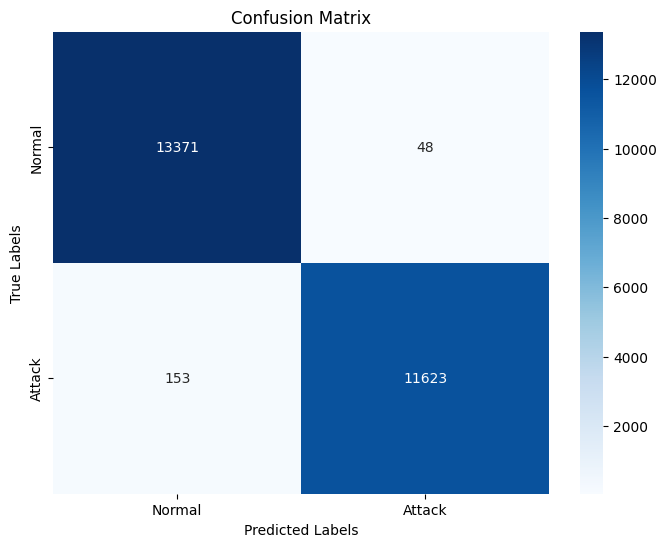

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, pred_binary)


# Plot confusion matrix using seaborn heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Receiver Operating Characteristic (ROC) Curve

ROC AUC Score: 0.991715227582281


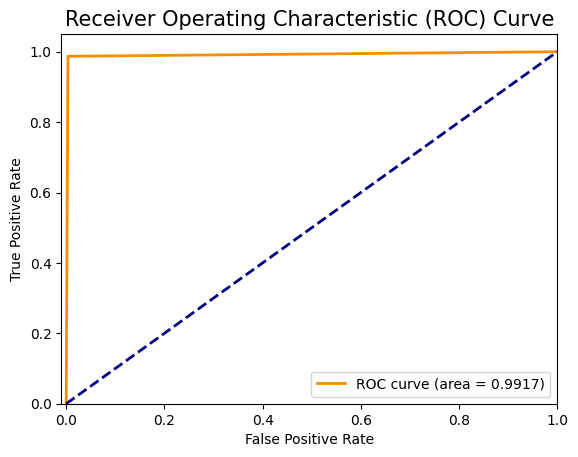

In [27]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = roc_auc_score(y_test, pred)
print('ROC AUC Score:', roc_auc)

# Plot ROC curve if desiredS
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',fontsize=15)
plt.legend(loc='lower right')
plt.show()

# Performance metrics

In [28]:
# Printing metrics
print("*"*50)
print("\tPerformance metrics")
print("*"*50)
print(f'\nAccuracy\t\t:', accuracy)
print(f'\nF1-score\t\t:', f1)
print(f'\nPrecision\t\t:', precision)
print(f'\nRecall\t\t\t:', recall)
print(f'\nROC AUC\t\t\t:', roc_auc)
print(f'\nError rate\t\t:', error_rate)

**************************************************
	Performance metrics
**************************************************

Accuracy		: 0.9920222266322684

F1-score		: 0.9919836404939488

Precision		: 0.9922870104705184

Recall			: 0.9917152275822811

ROC AUC			: 0.991715227582281

Error rate		: 0.007977773367731644
